## Import Libraries

In [1]:
import pandas eas pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Import dataset

In [3]:
dataset = pd.read_csv('Iris.csv')

In [4]:
dataset

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
SepalLengthCm    150 non-null float64
SepalWidthCm     150 non-null float64
PetalLengthCm    150 non-null float64
PetalWidthCm     150 non-null float64
Species          150 non-null object
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
dataset.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


## Visualize the data

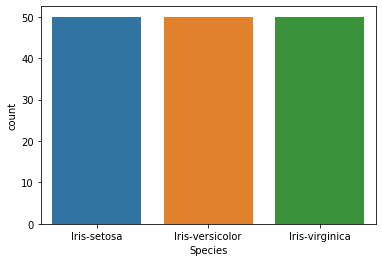

In [7]:
sns.countplot(dataset['Species'], label='Count')

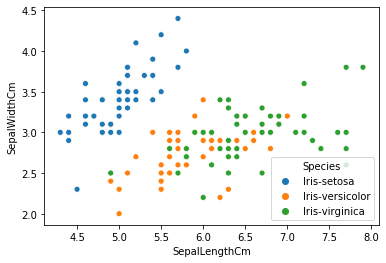

In [8]:
sns.scatterplot(x='SepalLengthCm', y='SepalWidthCm', hue=dataset['Species'], data=dataset)

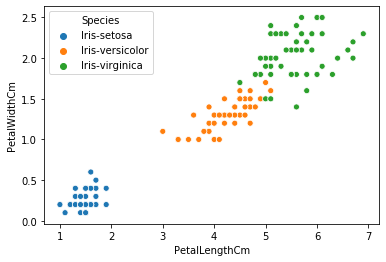

In [9]:
sns.scatterplot(x='PetalLengthCm', y='PetalWidthCm', hue=dataset['Species'], data=dataset)

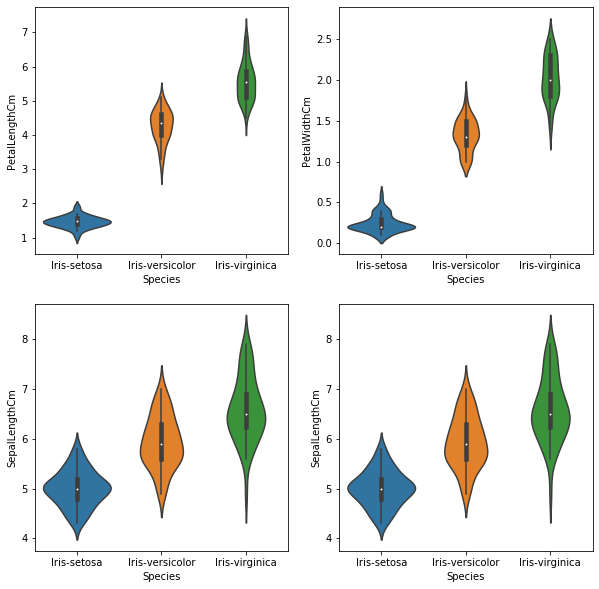

In [14]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 2, 1)
sns.violinplot(x='Species', y='PetalLengthCm', data=dataset)
plt.subplot(2, 2, 2)
sns.violinplot(x='Species', y='PetalWidthCm', data=dataset)
plt.subplot(2, 2, 3)
sns.violinplot(x='Species', y='SepalLengthCm', data=dataset)
plt.subplot(2, 2, 4)
sns.violinplot(x='Species', y='SepalLengthCm', data=dataset)

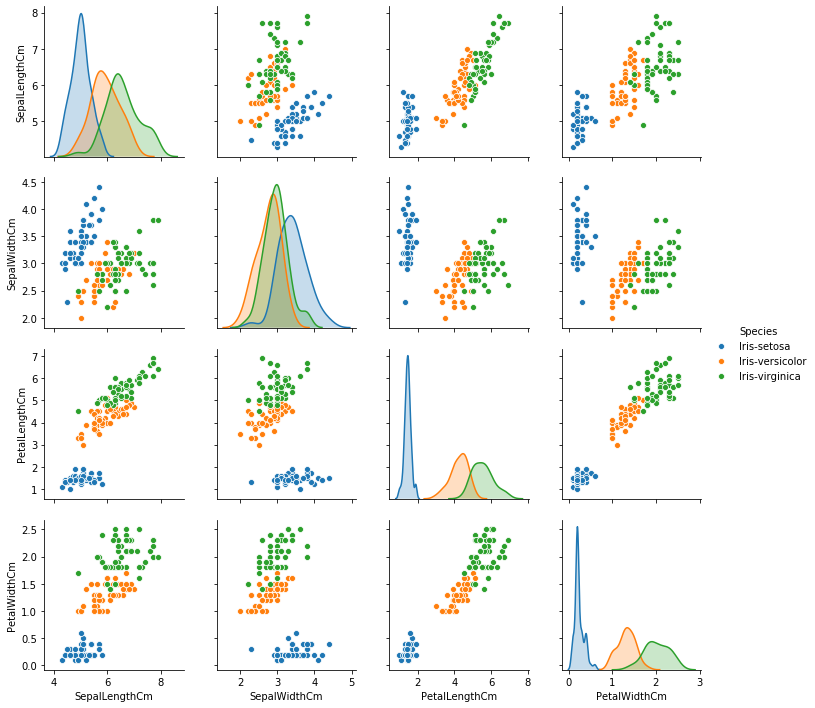

In [16]:
sns.pairplot(dataset, hue='Species')

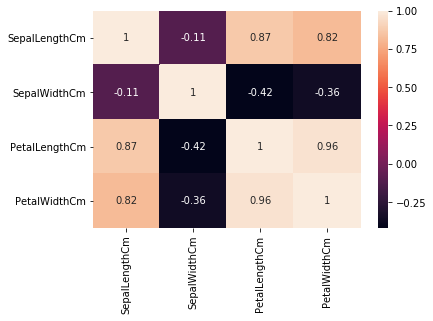

In [18]:
sns.heatmap(dataset.corr(), annot=True)

## Data Cleaning

In [19]:
X = dataset.drop('Species', axis=1)
y = dataset['Species']

In [20]:
X

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [21]:
y

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: object

In [50]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [51]:
X_train.shape

(120, 4)

In [52]:
X_test.shape

(30, 4)

In [53]:
y_train.shape

(120,)

In [54]:
y_test.shape

(30,)

## Model Training

In [55]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report

In [56]:
classifier = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)

In [57]:
classifier.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

## Model Testing

In [58]:
y_pred = classifier.predict(X_test)

In [59]:
y_pred

array(['Iris-virginica', 'Iris-versicolor', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-virginica', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-setosa'], dtype=object)

In [60]:
cm = confusion_matrix(y_test, y_pred)

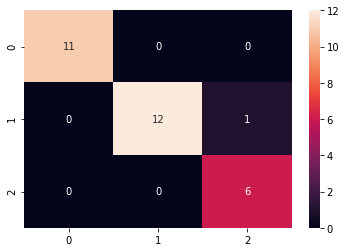

In [61]:
sns.heatmap(cm, annot=True)

In [62]:
print(classification_report(y_test, y_pred))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        11
Iris-versicolor       1.00      0.92      0.96        13
 Iris-virginica       0.86      1.00      0.92         6

       accuracy                           0.97        30
      macro avg       0.95      0.97      0.96        30
   weighted avg       0.97      0.97      0.97        30

